# [Chapter 4](https://github.com/Ziaeemehr/netsci/blob/main/docs/examples/chap_04.ipynb)

#### **THE SCALE-FREE PROPERTY**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/netsci/blob/main/docs/examples/chap_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# uncomment and run this line to install the package on colab
# !pip install "git+https://github.com/Ziaeemehr/netsci.git" -q

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netsci.utils import generate_power_law_dist, generate_power_law_dist_bounded

In [2]:
LABELSIZE = 13
plt.rc('axes', labelsize=LABELSIZE)
plt.rc('axes', titlesize=LABELSIZE)
plt.rc('figure', titlesize=LABELSIZE)
plt.rc('legend', fontsize=LABELSIZE)
plt.rc('xtick', labelsize=LABELSIZE)
plt.rc('ytick', labelsize=LABELSIZE)
# set legend font size 
plt.rc('legend', fontsize=10)

#### Figure 4.4, Comparing Poisson and Powe-law Distributions

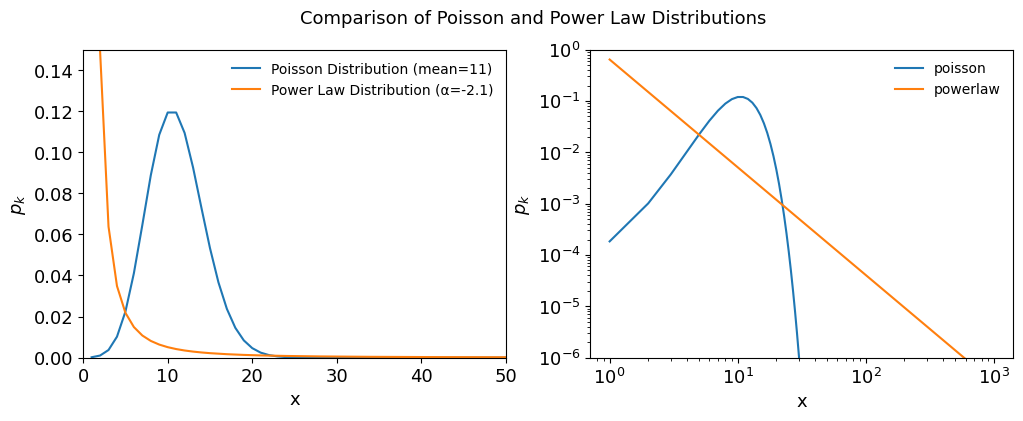

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
mean_poisson = 11
alpha_power_law = 2.1
x_values = np.arange(1, 1000)

# Poisson Distribution
poisson_pmf = poisson.pmf(x_values, mean_poisson)

# Power Law Distribution
power_law_pdf = x_values ** (-alpha_power_law)
# Normalize power-law PDF to make it a valid probability distribution
power_law_pdf /= np.sum(power_law_pdf)

# Plotting

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(x_values, poisson_pmf, label='Poisson Distribution (mean=11)')
ax[0].plot(x_values, power_law_pdf, label='Power Law Distribution (α=-2.1)')
ax[0].set_xlim([0,50])
ax[0].set_ylim([0,0.15])
ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$p_k$')
fig.suptitle('Comparison of Poisson and Power Law Distributions')
ax[0].legend(frameon=False)
ax[1].loglog(x_values, poisson_pmf, label="poisson")
ax[1].loglog(x_values, power_law_pdf, label="powerlaw")
ax[1].set_ylim([1e-6, 1])
ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$p_k$')
ax[1].legend(frameon=False);

#### load sample graphs of the book

In [4]:
from netsci.utils import list_sample_graphs, load_sample_graph
from netsci.analysis import graph_info

# on colab:
nets = ['Collaboration', 'Internet', 'PowerGrid', 'Protein', 'PhoneCalls', 'Citation', 'Metabolic', 'Email', 'WWW', 'Actor']

# on local:
nets = list(list_sample_graphs().keys())
print(nets)

['Collaboration', 'Internet', 'PowerGrid', 'Protein', 'PhoneCalls', 'Citation', 'Metabolic', 'Email', 'WWW', 'Actor']


#### On Google Colab only

In [ ]:
from google.colab import drive
import os

# URL of the zip file to be downloaded
url = "https://networksciencebook.com/translations/en/resources/networks.zip"
# Mount Google Drive
drive.mount('/content/drive')
# Create the 'network_science' directory in MyDrive if it doesn't exist
network_science_dir = '/content/drive/MyDrive/network_science'
os.makedirs(network_science_dir, exist_ok=True)
# empty the directory
!rm -rf /content/drive/MyDrive/network_science/*
# Change directory to 'network_science'
os.chdir(network_science_dir)
# Download the zip file to the 'network_science' directory
!wget $url -O networks.zip
# Unzip the downloaded file in the 'network_science' directory
!unzip networks.zip

json_file = "https://raw.githubusercontent.com/Ziaeemehr/netsci/main/netsci/datasets/sample_graphs.json"
# download json file
!wget $json_file -O sample_graphs.json

Graph information
Directed                                :                False
Number of nodes                         :                23133
Number of edges                         :                93439
Average degree                          :               8.0784
Connectivity                            :         disconnected
Calculating best minimal value for power law fit
 α =  1.410, σ = ±  0.037


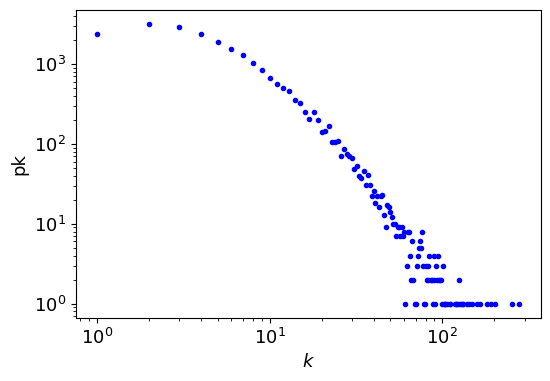

In [5]:
import powerlaw
from collections import Counter
from scipy.stats import poisson


G_collab = load_sample_graph("Collaboration") # on colab: add colab_path=network_science_dir
graph_info(G_collab, quick=True)
degrees = list(dict(G_collab.degree()).values())
degree_count = Counter(degrees)
k, pk = zip(*degree_count.items())

plt.figure(figsize=(6,4))
plt.loglog(k, pk, 'b.', label=r"$k$")
plt.xlabel(r"$k$")
plt.ylabel("pk");

fit = powerlaw.Fit(pk) # xmax=80
print(f" α = {fit.power_law.alpha:6.3f}, σ = ± {fit.power_law.sigma:6.3f}") # the exponent

#### Generate the powerlaw distribution (bounded)

In [6]:
generate_power_law_dist?

Signature: generate_power_law_dist(N: int, a: float, xmin: float)
Docstring:
generate power law random numbers p(k) ~ x^(-a) for a>1

Parameters
-----------
N:
    is the number of random numbers
a:
    is the exponent
xmin:
    is the minimum value of distribution

Returns
-----------
value: np.array
    powerlaw distribution
File:      ~/git/workshops/network_science/netsci/netsci/utils.py
Type:      function

In [7]:
generate_power_law_dist_bounded?

Signature:
generate_power_law_dist_bounded(
    N: int,
    a: float,
    xmin: float,
    xmax: float,
    seed: int = -1,
)
Docstring:
Generate a power law distribution of floats p(k) ~ x^(-a) for a>1
which is bounded by xmin and xmax

parameters :
    N: int
        number of samples in powerlaw distribution (pwd).
    a:
        exponent of the pwd.
    xmin:
        min value in pwd.
    xmax:
        max value in pwd.
File:      ~/git/workshops/network_science/netsci/netsci/utils.py
Type:      function

plotting the powerlaw distributions

In [8]:
def plot_distribution(vrs, N, a, xmin, ax, labelsize=10):

    # plotting the PDF estimated from variates
    bin_min, bin_max = np.min(vrs), np.max(vrs)
    bins = 10**(np.linspace(np.log10(bin_min), np.log10(bin_max), 100))
    counts, edges = np.histogram(vrs, bins, density=True)
    centers = (edges[1:] + edges[:-1])/2.

    # plotting the expected PDF
    xs = np.linspace(bin_min, bin_max, N)
    expected_pdf = [(a-1) * xmin**(a-1) * x**(-a) for x in xs] # according to eq. 4.12 network science barabasi 2016
    ax.loglog(xs, expected_pdf, color='red', ls='--', label=r"$x^{-\gamma}$,"+ r"${\gamma}$="+f"{-a:.2f}")
    ax.loglog(centers, counts, 'k.', label='data')
    ax.legend(fontsize=labelsize)
    ax.set_xlabel("values")
    ax.set_ylabel("PDF")
    

1.000035809608483 74.39513593875918


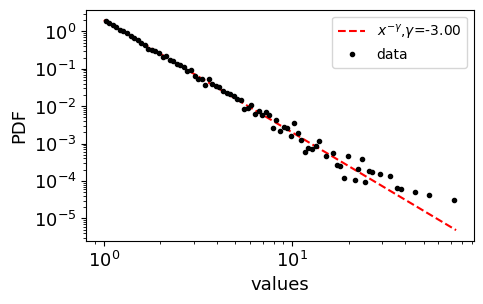

In [9]:
np.random.seed(2)

N = 10000
a = 3.0
xmin = 1
xmax = 100

fig, ax = plt.subplots(1, figsize=(5,3))
x = generate_power_law_dist_bounded(N, a, xmin, xmax)
print (np.min(x), np.max(x))
plot_distribution(x, N, a, xmin, ax)


In [10]:
# find the exponent by fitting a power law by powerlaw package

import powerlaw
fit = powerlaw.Fit(x) # xmax=50 we can constrain the max value for fitting
print(f"{fit.power_law.alpha=}") # the exponent
print(f"{fit.power_law.sigma=}") # standard error

Calculating best minimal value for power law fit
fit.power_law.alpha=np.float64(2.995340848455978)
fit.power_law.sigma=np.float64(0.02600579145725683)


Generate descereted power law distribution

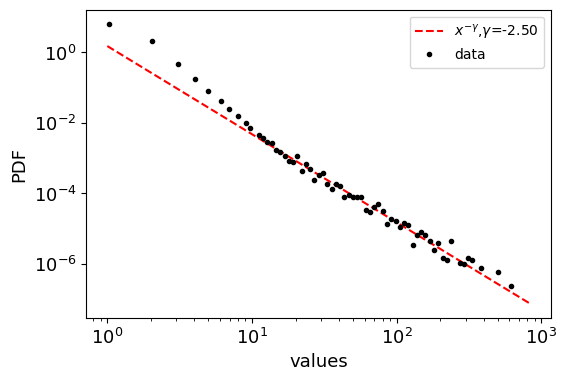

In [11]:
from netsci.utils import generate_power_law_discrete
# Example usage
gamma = 2.5  # Power-law exponent
k_min = 1    # Minimum value of k
k_max = 1000 # Maximum value of k
size = 100000 # Number of samples

samples = generate_power_law_discrete(size, gamma, k_min, k_max, seed=1)
fig, ax = plt.subplots(1, figsize=(6,4))
plot_distribution(samples, size, gamma, k_min, ax)

#### Table 4.1
loading with igraph

In [12]:
import os
import igraph as ig
from tqdm import tqdm
from netsci.utils import list_sample_graphs
from netsci.utils import get_sample_dataset_path
from netsci.utils import download_sample_dataset
from netsci.utils import load_sample_graphi

# download_sample_dataset()
sample_graph_names = list(list_sample_graphs().keys()) # not on colab
sample_graph_names

['Collaboration',
 'Internet',
 'PowerGrid',
 'Protein',
 'PhoneCalls',
 'Citation',
 'Metabolic',
 'Email',
 'WWW',
 'Actor']

In [31]:
# select the files in the path ending with .edgelist.txt
graphs = {}

for name in tqdm(sample_graph_names, desc="processing graphs"):
    G = load_sample_graphi(name) # on colab: add colab_path=network_science_dir
    directed = G.is_directed()
    if directed:
        in_degrees = G.degree(mode="in")
        out_degrees = G.degree(mode="out")
        in_degree_count = Counter(in_degrees) 
        out_degree_count = Counter(out_degrees)
        in_k, in_pk = zip(*in_degree_count.items())
        out_k, out_pk = zip(*out_degree_count.items())
        graphs[name]={}
        graphs[name]['in_k']=in_k
        graphs[name]['in_pk']=in_pk
        graphs[name]['out_k']=out_k
        graphs[name]['out_pk']=out_pk
        graphs[name]['directed']=True
    else:
        degrees = G.degree()
        degree_count = Counter(degrees)
        k, pk = zip(*degree_count.items())
        graphs[name]={}
        graphs[name]['k']=k
        graphs[name]['pk']=pk
        graphs[name]['directed']=False

processing graphs: 100%|██████████| 10/10 [00:40<00:00,  4.05s/it]


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


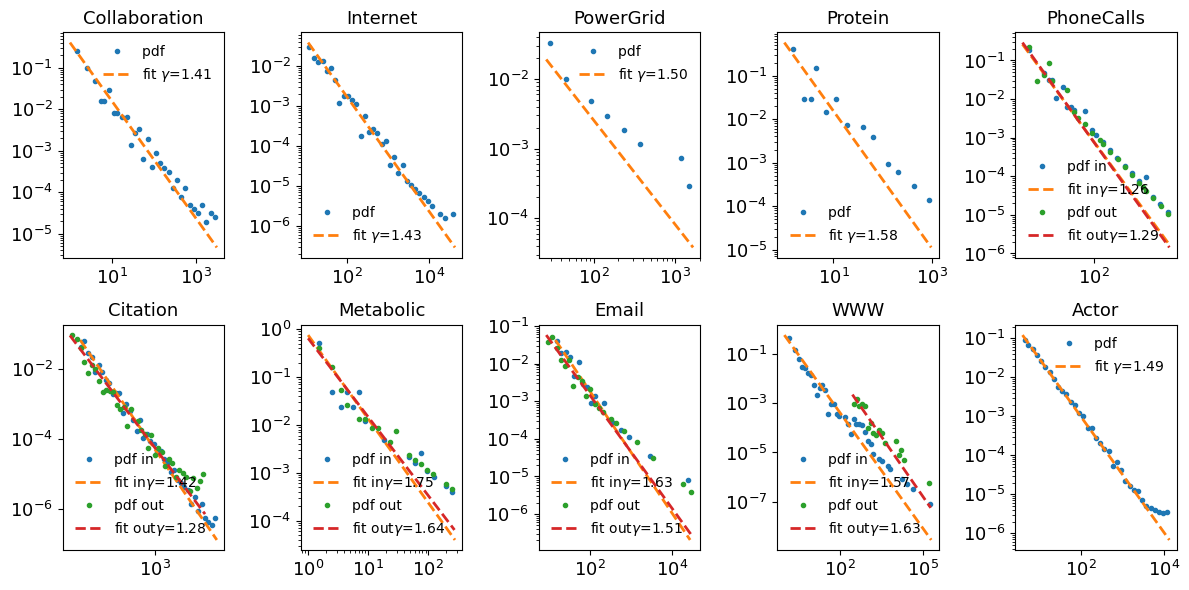

In [35]:
def fit_powerlaw(k, pk, ax, label=None, label_inout=""):
    
    fit = powerlaw.Fit(pk)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    fit.plot_pdf(lw=2, ax=ax, marker='.', label='pdf ' + label_inout, ls='')    
    fit.power_law.plot_pdf(lw=2, ax=ax, ls='--', label='fit ' + label_inout+ f"$\gamma$={alpha:.2f}" )    
    # ax.text(0.1, 0.1, f"α = {alpha:.2f}, σ = ± {sigma:.2f}", transform=ax.transAxes)
    ax.set_title(name)
    ax.legend(frameon=False)
    return alpha, sigma

fig, ax = plt.subplots(2, 5, figsize=(12, 6))
ax = ax.ravel()
counter = 0
alpha_list = {}
for name, data in graphs.items():
    if data['directed']:
        alpha_in, sigma_in = fit_powerlaw(data['in_k'], data['in_pk'], ax[counter], label=name, label_inout="in")
        alpha_out, sigma_out = fit_powerlaw(data['out_k'], data['out_pk'], ax[counter], label=name, label_inout="out")
    else:
        alpha, sigma = fit_powerlaw(data['k'], data['pk'], ax[counter], label=name)
    alpha_list[name] = (alpha, sigma)
    counter += 1
plt.tight_layout();
# ax.legend(frameon=False);

In [ ]:
# np.mean(graphs['www']['k']), np.mean(graphs['www']['pk'])
np.mean(graphs['collaboration']['k']), np.mean(graphs['collaboration']['pk'])

(np.float64(68.5327868852459), np.float64(189.61475409836066))

### Powerlaw package

- Alstott, J., Bullmore, E. and Plenz, D., 2014. powerlaw: a Python package for analysis of heavy-tailed distributions. PloS one, 9(1), p.e85777.

    - probability density function (PDF), 
    - cumulative distribution function (CDF)
    - complementary cumulative distribution (CCDF)

Calculating best minimal value for power law fit


fit.power_law.alpha=2.995340848455978
fit.power_law.sigma=0.02600579145725683
----------------------------------------------------------------------
(894.9727455051284, 5.263968413468816e-22)


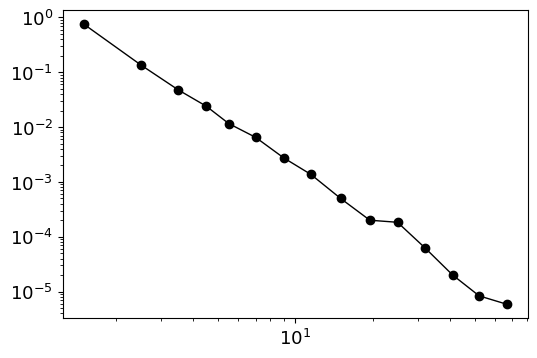

In [ ]:
import powerlaw
fig, ax = plt.subplots(1, figsize=(6,4))
fit = powerlaw.Fit(x) # xmax=50
print(f"{fit.power_law.alpha=}")
print(f"{fit.power_law.sigma=}")
print("-"*70)
print(fit.distribution_compare("power_law", "exponential"))

powerlaw.plot_pdf(x, linear_bins=0, color='k', marker='o', lw=1, ax=ax);

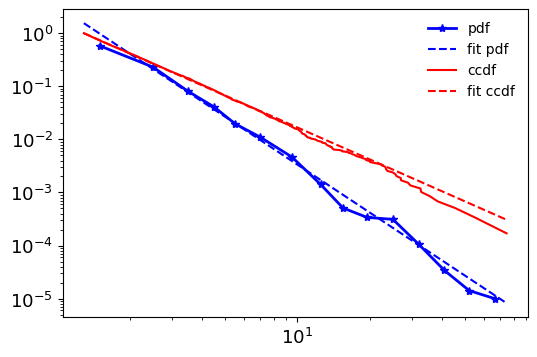

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,4))
fit.plot_pdf(c='b', lw=2, marker="*", label='pdf', ax=ax)
fit.power_law.plot_pdf(c='b', ax=ax, ls='--', label='fit pdf')
fit.plot_ccdf(c='r', ax=ax, ls="-", label='ccdf')
fit.power_law.plot_ccdf(c='r', ax=ax, ls='--', label='fit ccdf')
ax.legend(frameon=False);
